# Data Augmenttation

In [13]:
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
def plots(ims, figsize = (12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0 ,2 ,3 ,1))
    f = plt.figure(figsize = figsize)
    cols = len(ims) // rows if len(ims)%2 == 0 else len(ims) // rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize = 16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

load image

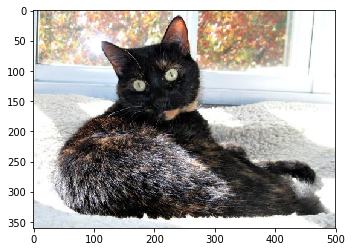

In [15]:
image_path = "cat.jpg"
image = plt.imread(image_path)
plt.imshow(image)

In [16]:
generator = ImageDataGenerator(rotation_range=10, #旋转
                               width_shift_range=0.1, #宽度
                               height_shift_range=0.1, #高度
                               shear_range=0.15, #图片剪切
                               zoom_range=0.1, #缩放
                               channel_shift_range=10, #三通道转换
                               brightness_range=(0.9, 0.7), #亮度
                               horizontal_flip=True) #水平移动                     

In [17]:
image = np.expand_dims(image, 0)
aug_iter = generator.flow(image)

In [18]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

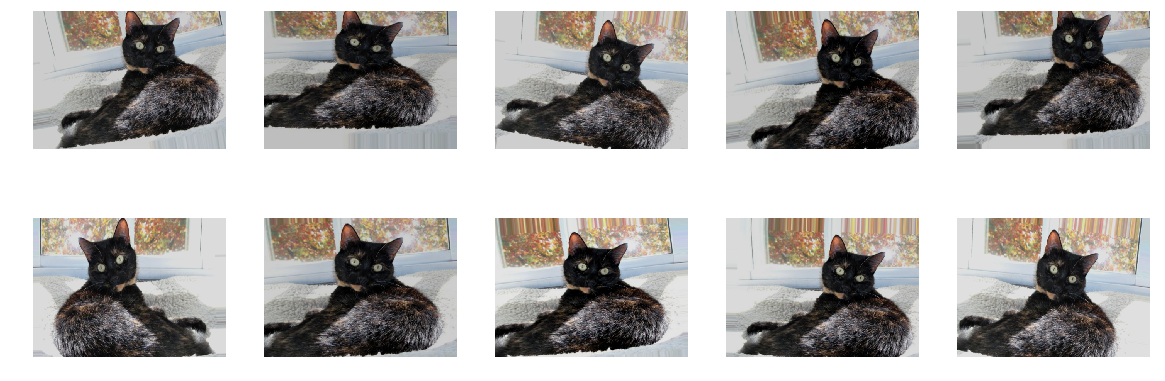

In [25]:
plots(aug_images, figsize = (20,7), rows = 2)